#  Домашнее задание по NLP # 3 [100 баллов] 
## Классификация и генерация фамилий 

В этом домашнем задании вам предстоит классифицировать и генерировать фамилии на 19 разных языках. Обучающие данные хранятся в папке data и разбиты по языкам: один язык – одна подпапка. Ниже представлен код для считывания данных в словарь вида: 
```d{язык} : [список имен]```.

## Часть 1. Предварительная обработка данных [10 баллов]

1. Удалите неоднозначные фамилии (т.е. одинаковые фамилии на разных языка), если такие есть;
2. Оцените 
* среднюю длину фамилии по всей коллекции
* по каждому языку
3. Для последующей классификации (части 2 и 3) оздайте обучающее и тестовое множество так, чтобы в обучающем множестве классы были сбалансированы: то есть, в обучающее множество должно входить примерно одинаковое количество фамилий на разных ящыка. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter('ignore')

import nltk

In [2]:
df=pd.DataFrame()
for filename in glob.glob('./data/names/*.txt'):
    category = filename.split('/')[-1].split('.')[0]
    df_temp = pd.read_csv(filename, names=['names'], encoding='utf8')
    df_temp['labels'] = category
    df = pd.concat([df,df_temp], ignore_index=True)
df['names'] = df['names'].str.lower()

In [3]:
df.sample(5)

,names,labels
5998,slattery,English
11064,dorofeev,Russian
2179,tsucgimoto,Japanese
12683,jadanovsky,Russian
18058,jon,Korean


In [4]:
chars = [char  for name in df['names'].tolist() for char in name]
freq = nltk.FreqDist(chars)

print(list(freq.keys()))

['a', 'b', 'e', 'l', 'r', 'h', 'm', 'd', 't', 'c', 'u', 'i', 's', 'g', 'n', 'x', 'o', 'é', 'y', 'f', 'v', 'p', "'", 'z', ' ', 'j', 'q', 'ê', 'ç', 'w', 'k', 'ú', 'à', 'ó', 'ò', 'ù', 'ì', 'è', 'ã', 'õ', 'á', 'í', 'ñ', '-', '\xa0', ':', 'ü', 'ä', 'ö', 'ß', 'ż', 'ń', 'ł', 'ś', 'ą', '/', '1']


In [5]:
df[df['names'].str.contains('[:/1]+', regex=True)]

,names,labels
18354,lu:,Chinese
19819,maxa/b,Czech
19915,rafaj1,Czech
20028,urbanek1,Czech
20057,whitmire1,Czech


In [6]:
df['names'] = df['names'].str.replace('[:/1]+','', regex=True)
df['names'] = df['names'].str.strip()

In [7]:
#удалим неоднозначные фамилии
df.drop(df[df.names.str.contains('to the first')].index, inplace=True)
df.drop_duplicates(['names'], keep=False, inplace=True)

In [8]:
chars = [char  for name in df['names'].tolist() for char in name]
freq = nltk.FreqDist(chars)

print(list(freq.keys()))

['a', 'r', 'c', 'h', 'm', 'b', 'u', 'l', 't', 'i', 's', 'e', 'd', 'n', 'x', 'é', 'g', 'o', 'f', 'y', 'v', 'p', "'", 'z', ' ', 'j', 'ê', 'q', 'ç', 'w', 'k', 'ú', 'à', 'ò', 'ù', 'ì', 'è', 'ã', 'õ', 'á', 'í', 'ó', 'ñ', '-', 'ü', 'ä', 'ö', 'ß', 'ż', 'ń', 'ł', 'ś', 'ą']


In [9]:
df.shape

(16759, 2)

In [10]:
df['len'] = df['names'].str.len()

In [11]:
#статистики длины имен
df.describe().T

,count,mean,std,min,25%,50%,75%,max
len,16759.0,7.431231,2.057598,2.0,6.0,7.0,9.0,20.0


In [12]:
#средняя длина по классам
df.groupby('labels')['len'].agg('mean')

labels
Chinese       3.702703
Czech         6.672566
Dutch         7.166667
English       6.433839
French        7.100962
German        6.867797
Greek         8.789474
Irish         7.367089
Italian       7.054962
Japanese      6.723751
Korean        3.459016
Polish        7.333333
Portuguese    6.593750
Russian       8.097904
Scottish      3.000000
Spanish       6.739726
Vietnamese    3.849057
Name: len, dtype: float64

In [13]:
df['labels'].value_counts()

Russian       9254
English       3363
Japanese       981
Italian        655
German         590
Czech          452
Dutch          234
Spanish        219
French         208
Greek          190
Chinese        185
Irish          158
Polish         123
Korean          61
Vietnamese      53
Portuguese      32
Scottish         1
Name: labels, dtype: int64

In [14]:
#после удаления неоднозначных фамилий, шотландская осталась только одна. Не повезвло шотландцам
df.drop(df[df.labels=='Scottish'].index, inplace=True)

In [15]:
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])
labels=le.classes_
df['labels'].value_counts()

13    9254
3     3363
9      981
8      655
5      590
1      452
2      234
14     219
4      208
6      190
0      185
7      158
11     123
10      61
15      53
12      32
Name: labels, dtype: int64

In [16]:
print(labels)

['Chinese' 'Czech' 'Dutch' 'English' 'French' 'German' 'Greek' 'Irish'
 'Italian' 'Japanese' 'Korean' 'Polish' 'Portuguese' 'Russian' 'Spanish'
 'Vietnamese']


In [17]:
#делаем стратифицированное разбиение на train и test
X_train, X_test, y_train, y_test = train_test_split(df['names'], df['labels'], test_size=0.20, stratify=df['labels'], random_state=42)
y_train.value_counts()

13    7403
3     2690
9      785
8      524
5      472
1      362
2      187
14     175
4      166
6      152
0      148
7      126
11      98
10      49
15      43
12      26
Name: labels, dtype: int64

##  Часть 2. Базовый метод классификации [20 баллов]



Используйте метод наивного Байеса, логистическую регрессию или любой другой метод для классификации фамилий: в качестве признаков используйте символьные $n$-граммы. Сравните результаты, получаемые при разных $n=2,3,4$ по $F$-мере и аккуратности. В каких случаях метод ошибается?

Для генерации $n$-грамм используйте:

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

Для генерации символьных ngram будем использовать CountVectorizer 

In [25]:
#биграммы
vect = CountVectorizer(analyzer='char', ngram_range=(2,2))
X_train_v = vect.fit_transform(X_train)
print('Размер словаря биграмм: {}'.format(len(vect.vocabulary_)))
print(X_train.shape)
print(X_train_v.shape)

Размер словаря биграмм: 783
(13406,)
(13406, 783)


In [26]:
#триграммы
vect = CountVectorizer(analyzer='char', ngram_range=(3,3))
X_train_v = vect.fit_transform(X_train)
print('Размер словаря триграмм: {}'.format(len(vect.vocabulary_)))
print(X_train.shape)
print(X_train_v.shape)

Размер словаря триграмм: 5780
(13406,)
(13406, 5780)


In [27]:
#4-граммы
vect = CountVectorizer(analyzer='char', ngram_range=(4,4))
X_train_v = vect.fit_transform(X_train)
print('Размер словаря 4-грамм: {}'.format(len(vect.vocabulary_)))
print(X_train.shape)
print(X_train_v.shape)

Размер словаря 4-грамм: 19242
(13406,)
(13406, 19242)


Проведем классификацию несколькими разными моделями на разной размерности ngram

### MultinomialNB

#### ngram = 2

In [22]:
pipe_nb = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(2,2))),
    ('clf', MultinomialNB())
])
pipe_nb.fit(X_train, y_train)
predict_train = pipe_nb.predict(X_train)
predict_test = pipe_nb.predict(X_test)
print('MultinomialNB, ngram = 2:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))


MultinomialNB, ngram = 2:
Accuracy train: 0.7996
Accuracy test: 0.7798
F1 train: 0.7818
F1 test: 0.7563
             precision    recall  f1-score   support

    Chinese       1.00      0.19      0.32        37
      Czech       0.69      0.12      0.21        90
      Dutch       0.68      0.36      0.47        47
    English       0.68      0.79      0.73       673
     French       0.75      0.14      0.24        42
     German       0.53      0.49      0.51       118
      Greek       0.64      0.18      0.29        38
      Irish       0.95      0.62      0.75        32
    Italian       0.59      0.54      0.57       131
   Japanese       0.69      0.72      0.71       196
     Korean       0.00      0.00      0.00        12
     Polish       0.86      0.24      0.38        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.85      0.94      0.89      1851
    Spanish       0.67      0.18      0.29        44
 Vietnamese       0.00      0.00      0.00     

#### ngram = 3

In [23]:
pipe_nb = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(3,3))),
    ('clf', MultinomialNB())
])
pipe_nb.fit(X_train, y_train)
predict_train = pipe_nb.predict(X_train)
predict_test = pipe_nb.predict(X_test)
print('MultinomialNB, ngram = 3:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

MultinomialNB, ngram = 3:
Accuracy train: 0.8511
Accuracy test: 0.7897
F1 train: 0.8365
F1 test: 0.7613
             precision    recall  f1-score   support

    Chinese       1.00      0.14      0.24        37
      Czech       0.80      0.13      0.23        90
      Dutch       1.00      0.45      0.62        47
    English       0.69      0.85      0.76       673
     French       0.75      0.14      0.24        42
     German       0.52      0.36      0.43       118
      Greek       0.73      0.21      0.33        38
      Irish       0.82      0.28      0.42        32
    Italian       0.68      0.51      0.59       131
   Japanese       0.73      0.74      0.74       196
     Korean       0.00      0.00      0.00        12
     Polish       1.00      0.24      0.39        25
 Portuguese       1.00      0.17      0.29         6
    Russian       0.85      0.94      0.89      1851
    Spanish       0.83      0.11      0.20        44
 Vietnamese       0.00      0.00      0.00     

#### ngram = 4

In [24]:
pipe_nb = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(4,4))),
    ('clf', MultinomialNB())
])
pipe_nb.fit(X_train, y_train)
predict_train = pipe_nb.predict(X_train)
predict_test = pipe_nb.predict(X_test)
print('MultinomialNB, ngram = 4:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

MultinomialNB, ngram = 4:
Accuracy train: 0.8889
Accuracy test: 0.7622
F1 train: 0.8748
F1 test: 0.7189
             precision    recall  f1-score   support

    Chinese       0.00      0.00      0.00        37
      Czech       0.90      0.10      0.18        90
      Dutch       1.00      0.47      0.64        47
    English       0.70      0.76      0.73       673
     French       1.00      0.10      0.17        42
     German       0.49      0.19      0.28       118
      Greek       0.88      0.18      0.30        38
      Irish       0.75      0.09      0.17        32
    Italian       0.77      0.37      0.50       131
   Japanese       0.90      0.64      0.75       196
     Korean       0.00      0.00      0.00        12
     Polish       1.00      0.12      0.21        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.77      0.97      0.86      1851
    Spanish       1.00      0.05      0.09        44
 Vietnamese       0.00      0.00      0.00     

#### Выводы

Наилучший результат достигается на биграммах.

С увеличением размерности векторов (ngram=3,4) по f-мере на train видно, что модель переобучается.

По матрице ошибок, представленной ниже (ngram=4), видно, что модель не предсказала правильно ни одной китайской, корейской, вьетнамской и португальской фамилии. Большинство из них были предсказаны русскими фамилиями o_O

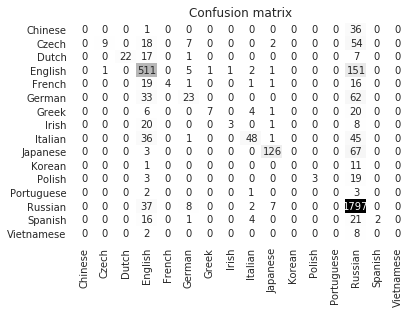

In [25]:
sns.heatmap(data=confusion_matrix(y_test, predict_test), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap='binary')
plt.title("Confusion matrix")
plt.show()

### RandomForestClassifier

#### ngram = 2

In [26]:
pipe_rf = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(2,2))),
    ('clf', RandomForestClassifier(n_estimators=100, min_samples_leaf=5))
])
pipe_rf.fit(X_train, y_train)
predict_train = pipe_rf.predict(X_train)
predict_test = pipe_rf.predict(X_test)
print('RandomForestClassifier, ngram = 2:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

RandomForestClassifier, ngram = 2:
Accuracy train: 0.7524
Accuracy test: 0.7264
F1 train: 0.6937
F1 test: 0.6623
             precision    recall  f1-score   support

    Chinese       0.43      0.08      0.14        37
      Czech       0.00      0.00      0.00        90
      Dutch       1.00      0.17      0.29        47
    English       0.57      0.80      0.67       673
     French       0.00      0.00      0.00        42
     German       0.56      0.08      0.13       118
      Greek       0.00      0.00      0.00        38
      Irish       1.00      0.03      0.06        32
    Italian       0.83      0.04      0.07       131
   Japanese       0.75      0.45      0.57       196
     Korean       0.00      0.00      0.00        12
     Polish       0.00      0.00      0.00        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.79      0.96      0.87      1851
    Spanish       0.71      0.11      0.20        44
 Vietnamese       0.00      0.00      

#### ngram = 3

In [27]:
pipe_rf = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(3,3))),
    ('clf', RandomForestClassifier(n_estimators=100, min_samples_leaf=5))
])
pipe_rf.fit(X_train, y_train)
predict_train = pipe_rf.predict(X_train)
predict_test = pipe_rf.predict(X_test)
print('RandomForestClassifier, ngram = 3:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

RandomForestClassifier, ngram = 3:
Accuracy train: 0.7710
Accuracy test: 0.7440
F1 train: 0.7271
F1 test: 0.6943
             precision    recall  f1-score   support

    Chinese       0.55      0.16      0.25        37
      Czech       0.50      0.02      0.04        90
      Dutch       1.00      0.17      0.29        47
    English       0.56      0.85      0.68       673
     French       1.00      0.05      0.09        42
     German       0.41      0.14      0.21       118
      Greek       1.00      0.03      0.05        38
      Irish       1.00      0.03      0.06        32
    Italian       0.62      0.12      0.20       131
   Japanese       0.76      0.64      0.69       196
     Korean       0.00      0.00      0.00        12
     Polish       0.00      0.00      0.00        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.84      0.94      0.89      1851
    Spanish       0.75      0.07      0.12        44
 Vietnamese       0.00      0.00      

#### ngram = 4

In [28]:
pipe_rf = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(4,4))),
    ('clf', RandomForestClassifier(n_estimators=100, min_samples_leaf=5))
])
pipe_rf.fit(X_train, y_train)
predict_train = pipe_rf.predict(X_train)
predict_test = pipe_rf.predict(X_test)
print('RandomForestClassifier, ngram = 4:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

RandomForestClassifier, ngram = 4:
Accuracy train: 0.6552
Accuracy test: 0.6348
F1 train: 0.5773
F1 test: 0.5480
             precision    recall  f1-score   support

    Chinese       0.00      0.00      0.00        37
      Czech       1.00      0.01      0.02        90
      Dutch       1.00      0.09      0.16        47
    English       0.80      0.28      0.41       673
     French       0.00      0.00      0.00        42
     German       0.85      0.09      0.17       118
      Greek       1.00      0.08      0.15        38
      Irish       0.00      0.00      0.00        32
    Italian       0.44      0.03      0.06       131
   Japanese       0.91      0.44      0.60       196
     Korean       0.00      0.00      0.00        12
     Polish       0.00      0.00      0.00        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.61      0.99      0.76      1851
    Spanish       0.00      0.00      0.00        44
 Vietnamese       0.00      0.00      

#### Выводы

В целом, случайный лес без настойки параметров (n_estimators=100, min_samples_leaf=5) показал результат хуже, чем наивный Байес. 

На все всех размерах биграмм переобучение модели не наблюдалось.
По матрице ошибок модель так же ошибается в предсказании нескольких языков.

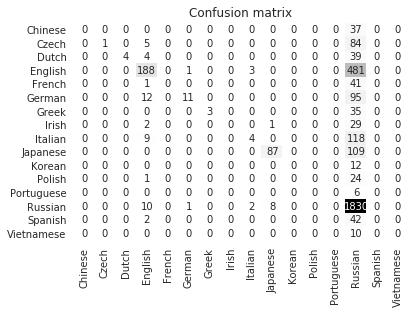

In [29]:
sns.heatmap(data=confusion_matrix(y_test, predict_test), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap='binary')
plt.title("Confusion matrix")
plt.show()

### LogisticRegression

#### ngram = 2

In [30]:
pipe_lr = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(2,2))),
    ('clf', LogisticRegression())
])
pipe_lr.fit(X_train, y_train)
predict_train = pipe_lr.predict(X_train)
predict_test = pipe_lr.predict(X_test)
print('LogisticRegression, ngram = 2:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

LogisticRegression, ngram = 2:
Accuracy train: 0.8520
Accuracy test: 0.8177
F1 train: 0.8397
F1 test: 0.7985
             precision    recall  f1-score   support

    Chinese       0.90      0.51      0.66        37
      Czech       0.42      0.12      0.19        90
      Dutch       0.85      0.49      0.62        47
    English       0.69      0.85      0.76       673
     French       0.64      0.21      0.32        42
     German       0.58      0.35      0.43       118
      Greek       0.85      0.45      0.59        38
      Irish       0.95      0.59      0.73        32
    Italian       0.73      0.69      0.71       131
   Japanese       0.83      0.82      0.82       196
     Korean       0.00      0.00      0.00        12
     Polish       0.78      0.28      0.41        25
 Portuguese       1.00      0.17      0.29         6
    Russian       0.89      0.95      0.92      1851
    Spanish       0.71      0.23      0.34        44
 Vietnamese       0.00      0.00      0.00

#### ngram = 3

In [31]:
pipe_lr = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(3,3))),
    ('clf', LogisticRegression())
])
pipe_lr.fit(X_train, y_train)
predict_train = pipe_lr.predict(X_train)
predict_test = pipe_lr.predict(X_test)
print('LogisticRegression, ngram = 3:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

LogisticRegression, ngram = 3:
Accuracy train: 0.9122
Accuracy test: 0.8097
F1 train: 0.9050
F1 test: 0.7835
             precision    recall  f1-score   support

    Chinese       0.73      0.30      0.42        37
      Czech       0.68      0.17      0.27        90
      Dutch       1.00      0.51      0.68        47
    English       0.68      0.88      0.77       673
     French       0.75      0.14      0.24        42
     German       0.60      0.36      0.45       118
      Greek       0.88      0.18      0.30        38
      Irish       1.00      0.22      0.36        32
    Italian       0.70      0.53      0.60       131
   Japanese       0.86      0.74      0.80       196
     Korean       0.00      0.00      0.00        12
     Polish       1.00      0.20      0.33        25
 Portuguese       1.00      0.17      0.29         6
    Russian       0.87      0.96      0.92      1851
    Spanish       0.82      0.20      0.33        44
 Vietnamese       0.00      0.00      0.00

#### ngram = 4

In [32]:
pipe_lr = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range=(4,4))),
    ('clf', LogisticRegression())
])
pipe_lr.fit(X_train, y_train)
predict_train = pipe_lr.predict(X_train)
predict_test = pipe_lr.predict(X_test)
print('LogisticRegression, ngram = 4:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

LogisticRegression, ngram = 4:
Accuracy train: 0.9062
Accuracy test: 0.7563
F1 train: 0.8930
F1 test: 0.7071
             precision    recall  f1-score   support

    Chinese       0.00      0.00      0.00        37
      Czech       0.83      0.06      0.10        90
      Dutch       1.00      0.40      0.58        47
    English       0.75      0.76      0.75       673
     French       0.60      0.07      0.13        42
     German       0.64      0.19      0.30       118
      Greek       1.00      0.08      0.15        38
      Irish       1.00      0.12      0.22        32
    Italian       0.77      0.25      0.38       131
   Japanese       0.95      0.58      0.72       196
     Korean       0.00      0.00      0.00        12
     Polish       1.00      0.12      0.21        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.75      0.98      0.85      1851
    Spanish       0.67      0.09      0.16        44
 Vietnamese       0.00      0.00      0.00

#### Выводы

Линейная модель с параметрами по умолчанию начинает переобучается уже даже на биграммах. Но f-мера лучше, чем у наивного Байеса. Дальнейшая регуляризация позволит еще больше повысить качество модели.

Ошибается линейная модель на тех же языках, что и наивный Байес

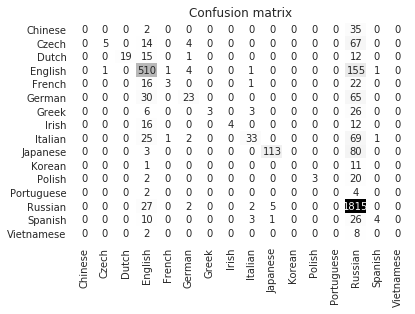

In [33]:
sns.heatmap(data=confusion_matrix(y_test, predict_test), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap='binary')
plt.title("Confusion matrix")
plt.show()

##  Часть 3. Нейронная сеть [35 баллов]


Используйте  реккурентную нейронную сеть с  LSTM для решения задачи. В ней может быть несколько слоев с LSTM, несколько слоев c Bidirectional(LSTM).  У нейронной сети один выход, определяющий класс фамилии. 

Представление имени для классификации в этом случае: 
1 вариант: бинарная матрица размера (количество букв в корпусе $\times$ максимальная длина имени). Обозначим его через $x$. Если первая буква имени a, то $x[1][1] = 1$, если вторая – b, то  $x[2][1] = 1$. То есть, используем one hot encoding для векторизации букв.  
2 вариант: Embedding'и символов. 

Выберите тот вариант, который вам проще или интереснее реализовать :) 

Не забудьте про регуляризацию нейронной сети дропаутами. 

Сравните результаты классификации разными методами по accuracy, micro- и macro- F-measure, precision, recall. Какой метод лучше и почему?

Сравните результаты, получаемые при разных значениях дропаута, разных числах узлов на слоях нейронной сети по $F$-мере и аккуратности. В каких случаях нейронная сеть ошибается?

Если совсем не получается запрограммировать нейронную сеть самостоятельно, обратитесь к туториалу тут: https://github.com/divamgupta/lstm-gender-predictor

####  LSTM

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, TimeDistributed, Bidirectional
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, Dropout

from keras.utils import to_categorical
from sklearn.utils import shuffle

Using TensorFlow backend.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['names'], df['labels'], test_size=0.20, stratify=df['labels'], random_state=42)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13406,), (13406,), (3352,), (3352,))

In [45]:
X_train.sample(5)

4812             kings
19346    moraitopoulos
16500         tzalikov
19966              sip
2620              dael
Name: names, dtype: object

In [46]:
y_train.sample(5)

11482    13
19619     1
5573      3
13012    13
15025    13
Name: labels, dtype: int64

In [21]:
n_neurons = 128
n_epoch = 20
embedding_size = 50
dropout = 0.2
batch_size = 32
chars = [char  for name in df['names'].tolist() for char in name]
vocab_size = len(list(set(chars)))
sequence_size = df.describe().loc['max','len'].astype(int)
n_output = df['labels'].nunique()
print('batch_size:', batch_size)
print('embedding_size:', embedding_size)
print('vocab_size:', vocab_size)
print('sequence_size:', sequence_size)
print('n_neurons:', n_neurons)
print('dropout:', dropout)
print('n_epoch:', n_epoch)
print('n_output:', n_output)

batch_size: 32
embedding_size: 50
vocab_size: 53
sequence_size: 20
n_neurons: 128
dropout: 0.2
n_epoch: 20
n_output: 16


In [48]:
X_train.iloc[0]

'cheruhin'

In [49]:
tokenizer = Tokenizer(num_words=vocab_size, char_level=True)
tokenizer.fit_on_texts(df['names'].tolist())
X_train = tokenizer.texts_to_sequences(X_train.tolist())
X_test = tokenizer.texts_to_sequences(X_test.tolist())
X_train[0]

[18, 7, 3, 6, 13, 7, 4, 5]

In [50]:
X_train = pad_sequences(X_train, maxlen=sequence_size, padding='post')
X_test = pad_sequences(X_test, maxlen=sequence_size, padding='post')
X_train[0]

array([18,  7,  3,  6, 13,  7,  4,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int32)

In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=sequence_size))
model.add(LSTM(n_neurons, return_sequences=True, dropout=dropout, recurrent_dropout=dropout))
model.add(LSTM(n_neurons, return_sequences=False, dropout=dropout, recurrent_dropout=dropout))
model.add(Dense(n_output, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose = 1)

Epoch 1/20
13406/13406 [==============================] - 114s 8ms/step - loss: 0.6840 - acc: 0.7885
Epoch 2/20
13406/13406 [==============================] - 107s 8ms/step - loss: 0.6489 - acc: 0.7998
Epoch 3/20
13406/13406 [==============================] - 31s 2ms/step - loss: 0.6183 - acc: 0.8061
Epoch 4/20
13406/13406 [==============================] - 81s 6ms/step - loss: 0.5855 - acc: 0.8128
Epoch 5/20
13406/13406 [==============================] - 33s 2ms/step - loss: 0.5628 - acc: 0.8198
Epoch 6/20
13406/13406 [==============================] - 73s 5ms/step - loss: 0.5468 - acc: 0.8257
Epoch 7/20
13406/13406 [==============================] - 56s 4ms/step - loss: 0.5235 - acc: 0.8298
Epoch 8/20
13406/13406 [==============================] - 32s 2ms/step - loss: 0.5064 - acc: 0.8330
Epoch 9/20
13406/13406 [==============================] - 45s 3ms/step - loss: 0.4925 - acc: 0.8406
Epoch 10/20
13406/13406 [==============================] - 39s 3ms/step - loss: 0.4734 - acc: 0.84

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            2650      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 128)           91648     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
Total params: 227,946
Trainable params: 227,946
Non-trainable params: 0
_________________________________________________________________


In [73]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [74]:
predict_test.shape, X_test.shape

((3352, 16), (3352, 20))

In [75]:
predict_test[1]

array([4.03096756e-08, 5.64205184e-05, 2.73029883e-07, 1.64247172e-06,
       1.08144164e-07, 5.11630901e-07, 1.43704952e-07, 8.46365026e-07,
       5.86333726e-07, 2.64770222e-07, 4.75361706e-09, 1.03440172e-07,
       8.22910007e-09, 9.99938965e-01, 7.17248909e-08, 2.55224979e-08],
      dtype=float32)

In [76]:
predict_train = np.argmax(predict_train ,axis=1)
predict_test = np.argmax(predict_test ,axis=1)
y_train = np.argmax(y_train ,axis=1)
y_test = np.argmax(y_test ,axis=1)

In [77]:
predict_train[0], y_train[0]

(13, 13)

In [78]:
print('LSTM:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

LSTM:
Accuracy train: 0.9214
Accuracy test: 0.8523
F1 train: 0.9184
F1 test: 0.8448
             precision    recall  f1-score   support

    Chinese       0.82      0.73      0.77        37
      Czech       0.46      0.30      0.36        90
      Dutch       0.80      0.43      0.56        47
    English       0.79      0.89      0.84       673
     French       0.60      0.36      0.45        42
     German       0.65      0.51      0.57       118
      Greek       0.89      0.63      0.74        38
      Irish       0.66      0.66      0.66        32
    Italian       0.73      0.84      0.78       131
   Japanese       0.87      0.88      0.88       196
     Korean       0.40      0.17      0.24        12
     Polish       0.67      0.40      0.50        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.93      0.95      0.94      1851
    Spanish       0.40      0.39      0.40        44
 Vietnamese       0.56      0.50      0.53        10

avg / total  

#### Bidirectional(LSTM)

In [89]:
n_neurons = 64
n_epoch = 10

In [97]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

In [91]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_size, input_length=sequence_size))
model2.add(Bidirectional(LSTM(n_neurons, return_sequences=True, dropout=dropout, recurrent_dropout=dropout)))
model2.add(Bidirectional(LSTM(n_neurons, return_sequences=False, dropout=dropout, recurrent_dropout=dropout)))
model2.add(Dense(n_output, activation = 'softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
%%time
model2.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose = 1)

Epoch 1/10
13406/13406 [==============================] - 35s 3ms/step - loss: 0.5505 - acc: 0.8251
Epoch 2/10
13406/13406 [==============================] - 42s 3ms/step - loss: 0.5312 - acc: 0.8290
Epoch 3/10
13406/13406 [==============================] - 64s 5ms/step - loss: 0.5143 - acc: 0.8329
Epoch 4/10
13406/13406 [==============================] - 64s 5ms/step - loss: 0.4957 - acc: 0.8390
Epoch 5/10
13406/13406 [==============================] - 54s 4ms/step - loss: 0.4800 - acc: 0.8435
Epoch 6/10
13406/13406 [==============================] - 61s 5ms/step - loss: 0.4608 - acc: 0.8502
Epoch 7/10
13406/13406 [==============================] - 62s 5ms/step - loss: 0.4392 - acc: 0.8550
Epoch 8/10
13406/13406 [==============================] - 62s 5ms/step - loss: 0.4292 - acc: 0.8560
Epoch 9/10
13406/13406 [==============================] - 72s 5ms/step - loss: 0.4206 - acc: 0.8609
Epoch 10/10
13406/13406 [==============================] - 74s 5ms/step - loss: 0.4030 - acc: 0.8652

In [99]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 50)            2650      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 20, 128)           58880     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2064      
Total params: 162,410
Trainable params: 162,410
Non-trainable params: 0
_________________________________________________________________


In [100]:
predict_train = model2.predict(X_train)
predict_test = model2.predict(X_test)
predict_train = np.argmax(predict_train ,axis=1)
predict_test = np.argmax(predict_test ,axis=1)
y_train = np.argmax(y_train ,axis=1)
y_test = np.argmax(y_test ,axis=1)

In [101]:
print('biLSTM:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

biLSTM:
Accuracy train: 0.8897
Accuracy test: 0.8416
F1 train: 0.8843
F1 test: 0.8340
             precision    recall  f1-score   support

    Chinese       0.63      0.78      0.70        37
      Czech       0.43      0.24      0.31        90
      Dutch       0.66      0.62      0.64        47
    English       0.75      0.89      0.81       673
     French       0.60      0.36      0.45        42
     German       0.67      0.39      0.49       118
      Greek       0.67      0.76      0.72        38
      Irish       0.63      0.59      0.61        32
    Italian       0.71      0.85      0.78       131
   Japanese       0.83      0.88      0.86       196
     Korean       0.12      0.08      0.10        12
     Polish       0.60      0.48      0.53        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.94      0.93      0.94      1851
    Spanish       0.47      0.32      0.38        44
 Vietnamese       0.71      0.50      0.59        10

avg / total

#### Подбор параметров LSTM сети

In [51]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
seed = 42
np.random.seed(seed)

In [52]:
def create_model(dropout_rate=0.1, neurons=10, embedding_size=50, vocab_size=53, sequence_size=20):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=sequence_size))
    model.add(LSTM(neurons, return_sequences=True, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(LSTM(neurons, return_sequences=False, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(n_output, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
model3 = KerasClassifier(build_fn=create_model, verbose=0)

In [54]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

Перебор параметров будем проводить на меньшем количестве эпох, количестве нейронов на скрытых слоях и кросс валидации на трех фолдах.

In [57]:
batch_size = [10, 100]
epochs = [2]
dropout_rate = [0.1, 0.9]
neurons = [2, 5]
embedding_size = [50, 100]

param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  dropout_rate=dropout_rate,
                  neurons=neurons,
                  embedding_size=embedding_size,                
                 )
grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1, refit=True, verbose=1)


In [58]:
%%time
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 42.5min finished


Best: 0.552215 using {'batch_size': 10, 'dropout_rate': 0.1, 'embedding_size': 50, 'epochs': 2, 'neurons': 2}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.1, 'embedding_size': 50, 'epochs': 2, 'neurons': 2}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.1, 'embedding_size': 50, 'epochs': 2, 'neurons': 5}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.1, 'embedding_size': 100, 'epochs': 2, 'neurons': 2}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.1, 'embedding_size': 100, 'epochs': 2, 'neurons': 5}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.9, 'embedding_size': 50, 'epochs': 2, 'neurons': 2}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.9, 'embedding_size': 50, 'epochs': 2, 'neurons': 5}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.9, 'embedding_size': 100, 'epochs': 2, 'neurons': 2}
0.552215 with: {'batch_size': 10, 'dropout_rate': 0.9, 'embedding_size': 100, 'epochs': 2, 'neurons': 5}
0.552215 with: {'batch_size': 100, 'dropout_rate': 0.1

In [62]:
predict_train = grid.predict(X_train)
predict_test = grid.predict(X_test)
#predict_train = np.argmax(predict_train ,axis=1)
#predict_test = np.argmax(predict_test ,axis=1)
y_train = np.argmax(y_train ,axis=1)
y_test = np.argmax(y_test ,axis=1)

In [63]:
print('gridsearch LSTM:')
print('Accuracy train: {0:6.4f}'.format(accuracy_score(y_train, predict_train)))
print('Accuracy test: {0:6.4f}'.format(accuracy_score(y_test, predict_test)))
print('F1 train: {0:6.4f}'.format(f1_score(y_train, predict_train, average='weighted')))
print('F1 test: {0:6.4f}'.format(f1_score(y_test, predict_test, average='weighted')))
print(classification_report(y_test, predict_test, target_names=labels))

gridsearch LSTM:
Accuracy train: 0.5522
Accuracy test: 0.5522
F1 train: 0.3929
F1 test: 0.3929
             precision    recall  f1-score   support

    Chinese       0.00      0.00      0.00        37
      Czech       0.00      0.00      0.00        90
      Dutch       0.00      0.00      0.00        47
    English       0.00      0.00      0.00       673
     French       0.00      0.00      0.00        42
     German       0.00      0.00      0.00       118
      Greek       0.00      0.00      0.00        38
      Irish       0.00      0.00      0.00        32
    Italian       0.00      0.00      0.00       131
   Japanese       0.00      0.00      0.00       196
     Korean       0.00      0.00      0.00        12
     Polish       0.00      0.00      0.00        25
 Portuguese       0.00      0.00      0.00         6
    Russian       0.55      1.00      0.71      1851
    Spanish       0.00      0.00      0.00        44
 Vietnamese       0.00      0.00      0.00        10

av

#### Выводы

Нейронные сети показали лучший результат, чем базовые модели. С китайскими, корейскими и вьетнамскими фамилиями результаты классификации лучше, чем у базовых моделей.

Двухслойный LSTM c 128 нейронами на каждом скрытом слое склонен к переобучению на тестовом наборе данных (даже, несмотря на дропауты везде, где можно). У двухслойного biLSTM на 64 нейронах переобучение было в меньшей степени.

Перебор параметров среди небольшого количества нейронов, 2 эпох, различных размеров эмбедингов, пакетов и коэффициентов дропаута привел к выбору модели с минимальными значениями из набора нейронов, дропаута и размера пакета



##  Часть 4. Генерация фамилии [35 баллов]

Используйте архитектуру нейронной сети из Части 3 для генерации имени. В этот момент можно забыть про разбиение коллекции на обучающее и тестовое множество. 

Рассмотрите два сценария генерация имени:
* обучение нейронной сети по всей коллекции
* обучение нейронной сети с обуславливанием на язык

Для обуславливания на язык нужно изменить векторное представление фамилии. До этого момента мы разбивали фамилию на отдельные символы и находили векторное представление каждого символа. Теперь добавим в начало фамилии метку языка и будем ее считать первым символов фамилии. Так нейронная сеть научиться понимать, на каком языке написана фамилия. 

Пример: ```[rus bos i v a n o v eos pad pad pad]```

Когда будем генерировать новую фамилию, будем начинать процесс генерации не с символа начала последовательности ```bos```, а с символа языка и символа начала последовательности ```rus bos```. 

Привидите несколько примеров удачно сгенерированных фамилий. 

#### обучение нейронной сети по всей коллекции

In [282]:
X_names = df.apply(lambda x: 'bos '+' '.join(list(x['names'])), axis=1)
Y_names = df.apply(lambda x: ' '+' '.join(list(x['names']))+' eos', axis=1)
print(X_names.shape)
print(X_names.iloc[0])
print(Y_names.iloc[0])

(16758,)
bos a r c h a m b a u l t
 a r c h a m b a u l t eos


In [278]:
sequence_size += 1

In [43]:
#pd.concat([X_names,Y_names]).tolist()

In [283]:
tokenizer = Tokenizer(num_words=vocab_size+2)
tokenizer.fit_on_texts(X_names+Y_names)
X_names = tokenizer.texts_to_sequences(X_names)
Y_names = tokenizer.texts_to_sequences(Y_names)

print(X_names[0])
print(Y_names[0])

[6, 1, 8, 20, 9, 1, 16, 19, 1, 15, 13, 14]
[1, 8, 20, 9, 1, 16, 19, 1, 15, 13, 14, 7]


In [284]:
print(tokenizer.word_index)

{'a': 1, 'o': 2, 'e': 3, 'i': 4, 'n': 5, 'bos': 6, 'eos': 7, 'r': 8, 'h': 9, 's': 10, 'k': 11, 'v': 12, 'l': 13, 't': 14, 'u': 15, 'm': 16, 'y': 17, 'd': 18, 'b': 19, 'c': 20, 'g': 21, 'z': 22, 'p': 23, 'f': 24, 'j': 25, 'w': 26, "'": 27, 'x': 28, 'q': 29, 'ö': 30, 'é': 31, 'í': 32, 'á': 33, 'ä': 34, 'ó': 35, 'ü': 36, 'ß': 37, 'à': 38, 'ñ': 39, 'ú': 40, 'ò': 41, 'ś': 42, 'è': 43, 'ã': 44, 'ż': 45, 'ê': 46, 'ç': 47, 'ù': 48, 'ì': 49, 'õ': 50, 'ń': 51, 'ł': 52, 'ą': 53}


In [285]:
X_train = pad_sequences(X_names, maxlen=sequence_size, padding='post')
y_train = pad_sequences(Y_names, maxlen=sequence_size, padding='post')
print(X_train.shape)
print(y_train.shape)
print(X_train[0])
print(y_train[0])

(16758, 21)
(16758, 21)
[ 6  1  8 20  9  1 16 19  1 15 13 14  0  0  0  0  0  0  0  0  0]
[ 1  8 20  9  1 16 19  1 15 13 14  7  0  0  0  0  0  0  0  0  0]


In [286]:
y_train_cat  = [to_categorical(sent, num_classes=vocab_size+2) for sent in y_train]
y_train =  np.asarray(y_train_cat)

In [287]:
print(y_train.shape)

(16758, 21, 55)


In [288]:
n_neurons = 128
n_epoch = 10
embedding_size = 50
dropout = 0.2
batch_size = 32

In [289]:
model4 = Sequential()

model4.add(Embedding(vocab_size+2, embedding_size, input_length=sequence_size))
model4.add(LSTM(n_neurons, return_sequences = True, dropout=dropout, recurrent_dropout=dropout))

model4.add(Dense(vocab_size+2, activation = 'softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [290]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 21, 50)            2750      
_________________________________________________________________
lstm_7 (LSTM)                (None, 21, 128)           91648     
_________________________________________________________________
dense_7 (Dense)              (None, 21, 55)            7095      
Total params: 101,493
Trainable params: 101,493
Non-trainable params: 0
_________________________________________________________________


In [291]:
%%time
for iteration in range(1, n_epoch):
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)
    model4.fit(X_train_shuffled, y_train_shuffled, batch_size=len(X_train), epochs=1, verbose = 1)

Epoch 1/1
16758/16758 [==============================] - 23s 1ms/step - loss: 4.0084 - acc: 0.0082
Epoch 1/1
16758/16758 [==============================] - 21s 1ms/step - loss: 3.9902 - acc: 0.2510
Epoch 1/1
16758/16758 [==============================] - 21s 1ms/step - loss: 3.9713 - acc: 0.6043
Epoch 1/1
16758/16758 [==============================] - 20s 1ms/step - loss: 3.9529 - acc: 0.6005
Epoch 1/1
16758/16758 [==============================] - 28s 2ms/step - loss: 3.9313 - acc: 0.5991
Epoch 1/1
16758/16758 [==============================] - 23s 1ms/step - loss: 3.9056 - acc: 0.5987
Epoch 1/1
16758/16758 [==============================] - 22s 1ms/step - loss: 3.8728 - acc: 0.5987
Epoch 1/1
16758/16758 [==============================] - 20s 1ms/step - loss: 3.8311 - acc: 0.5987
Epoch 1/1
16758/16758 [==============================] - 21s 1ms/step - loss: 3.7763 - acc: 0.5987
CPU times: user 11min 19s, sys: 28.8 s, total: 11min 48s
Wall time: 3min 21s


In [292]:
char_index = tokenizer.word_index
index_char = {i: c for c, i in char_index.items()}

In [293]:
def sample(preds):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) #/ temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.choice(range(vocab_size+2), p = preds)
    return probas

In [294]:
generated = ''
seed = 'bos'
generated += seed + ' '
print('----- Generating with seed: "' + seed + '"')
print(generated)


for i in range(7): 
    sequences = tokenizer.texts_to_sequences([seed])
#    print('sequences',sequences)
    X_pred = pad_sequences(sequences, maxlen=sequence_size, padding = 'post')
#    print('X_pred',X_pred)
    preds = model4.predict(X_pred, verbose=0)[0]
#    print('preds.shape',preds.shape)
    samples = [sample(p) for p in preds]
#    print('samples',samples)
    next_index = samples[i]
#    print('next_index',next_index)
    while next_index == 0 or next_index == 6:
        samples = [sample(p) for p in preds]
        next_index = samples[i]
    next_char = index_char[next_index]
#    print('next_char',next_char)
    generated += next_char + ' '
    print(generated)
    seed += ' ' + next_char
#    print('seed',seed)
    if next_char == 'eos':
        break


----- Generating with seed: "bos"
bos 
bos w 
bos w s 
bos w s ì 
bos w s ì q 
bos w s ì q ż 
bos w s ì q ż ś 
bos w s ì q ż ś ñ 


#### обучение нейронной сети с обуславливанием на язык

In [137]:
df['labels'] = le.inverse_transform(df['labels'])


In [205]:
df['prefix'] = df['labels'].str.slice(0, 3)
df.sample(5)

,names,labels,len,prefix
13011,jeverjeev,Russian,9,Rus
9862,baigozin,Russian,8,Rus
11472,filippishin,Russian,11,Rus
3994,fenton,English,6,Eng
11612,gasparov,Russian,8,Rus


In [99]:
sequence_size += 1

In [216]:
#df.apply(lambda x: x['prefix'].lower()+' '+'bos'+' '+' '.join(list(x['names'])), axis=1)

In [224]:
#Y_names = df['names']
X_names = df.apply(lambda x: x['prefix'].lower()+' bos '+' '.join(list(x['names'])), axis=1)
Y_names = df.apply(lambda x: ' bos '+' '.join(list(x['names']))+' eos', axis=1)

print(X_names.shape)
print(Y_names.shape)
print(X_names.iloc[0])
print(Y_names.iloc[0])

(16758,)
(16758,)
fre bos a r c h a m b a u l t
 bos a r c h a m b a u l t eos


In [225]:
tokenizer = Tokenizer(num_words=vocab_size+2+len(labels))
tokenizer.fit_on_texts(X_names+Y_names)
X_names = tokenizer.texts_to_sequences(X_names)
Y_names = tokenizer.texts_to_sequences(Y_names)

print(X_names[0])
print(Y_names[0])

[35, 1, 2, 8, 21, 9, 2, 17, 20, 2, 16, 13, 14]
[1, 2, 8, 21, 9, 2, 17, 20, 2, 16, 13, 14, 7]


In [226]:
print(tokenizer.word_index)

{'bos': 1, 'a': 2, 'o': 3, 'e': 4, 'i': 5, 'n': 6, 'eos': 7, 'r': 8, 'h': 9, 's': 10, 'k': 11, 'v': 12, 'l': 13, 't': 14, 'rus': 15, 'u': 16, 'm': 17, 'y': 18, 'd': 19, 'b': 20, 'c': 21, 'g': 22, 'z': 23, 'eng': 24, 'p': 25, 'f': 26, 'j': 27, 'w': 28, 'jap': 29, 'ita': 30, 'ger': 31, 'cze': 32, 'dut': 33, 'spa': 34, 'fre': 35, 'gre': 36, 'chi': 37, 'iri': 38, "'": 39, 'x': 40, 'pol': 41, 'q': 42, 'kor': 43, 'vie': 44, 'ö': 45, 'é': 46, 'por': 47, 'í': 48, 'á': 49, 'ä': 50, 'ó': 51, 'ü': 52, 'ß': 53, 'à': 54, 'ñ': 55, 'ú': 56, 'ò': 57, 'ś': 58, 'è': 59, 'ã': 60, 'ż': 61, 'ê': 62, 'ç': 63, 'ù': 64, 'ì': 65, 'õ': 66, 'ń': 67, 'ł': 68, 'ą': 69}


In [227]:
X_train = pad_sequences(X_names, maxlen=sequence_size, padding='post')
y_train = pad_sequences(Y_names, maxlen=sequence_size, padding='post')
print(X_train.shape)
print(y_train.shape)
print(X_train[0])
print(y_train[0])

(16758, 22)
(16758, 22)
[35  1  2  8 21  9  2 17 20  2 16 13 14  0  0  0  0  0  0  0  0  0]
[ 1  2  8 21  9  2 17 20  2 16 13 14  7  0  0  0  0  0  0  0  0  0]


In [228]:
y_train_cat  = [to_categorical(sent, num_classes=vocab_size+2+len(labels)) for sent in y_train]
y_train =  np.asarray(y_train_cat)

In [229]:
print(y_train.shape)

(16758, 22, 71)


In [230]:
model5 = Sequential()

model5.add(Embedding(vocab_size+2+len(labels), embedding_size, input_length=sequence_size))
model5.add(LSTM(n_neurons, return_sequences = True, dropout=dropout, recurrent_dropout=dropout))

model5.add(Dense(vocab_size+2+len(labels), activation = 'softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [231]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 22, 50)            3550      
_________________________________________________________________
lstm_6 (LSTM)                (None, 22, 128)           91648     
_________________________________________________________________
dense_6 (Dense)              (None, 22, 71)            9159      
Total params: 104,357
Trainable params: 104,357
Non-trainable params: 0
_________________________________________________________________


In [275]:
%%time
for iteration in range(1, n_epoch):
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)
    model5.fit(X_train_shuffled, y_train_shuffled, batch_size=len(X_train), epochs=1, verbose = 1)

Epoch 1/1
16758/16758 [==============================] - 20s 1ms/step - loss: 1.9794 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 20s 1ms/step - loss: 1.9071 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 23s 1ms/step - loss: 1.8855 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 27s 2ms/step - loss: 1.8971 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 24s 1ms/step - loss: 1.9251 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 24s 1ms/step - loss: 1.9561 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 23s 1ms/step - loss: 1.9794 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 23s 1ms/step - loss: 1.9929 - acc: 0.5715
Epoch 1/1
16758/16758 [==============================] - 23s 1ms/step - loss: 1.9940 - acc: 0.5715
CPU times: user 12min 32s, sys: 30.1 s, total: 13min 3s
Wall time: 3min 27s


In [235]:
char_index = tokenizer.word_index
index_char = {i: c for c, i in char_index.items()}

In [236]:
def sample(preds):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) #/ temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.choice(range(vocab_size+2+len(labels)), p = preds)
    return probas

In [266]:
print(tokenizer.word_index)

{'bos': 1, 'a': 2, 'o': 3, 'e': 4, 'i': 5, 'n': 6, 'eos': 7, 'r': 8, 'h': 9, 's': 10, 'k': 11, 'v': 12, 'l': 13, 't': 14, 'rus': 15, 'u': 16, 'm': 17, 'y': 18, 'd': 19, 'b': 20, 'c': 21, 'g': 22, 'z': 23, 'eng': 24, 'p': 25, 'f': 26, 'j': 27, 'w': 28, 'jap': 29, 'ita': 30, 'ger': 31, 'cze': 32, 'dut': 33, 'spa': 34, 'fre': 35, 'gre': 36, 'chi': 37, 'iri': 38, "'": 39, 'x': 40, 'pol': 41, 'q': 42, 'kor': 43, 'vie': 44, 'ö': 45, 'é': 46, 'por': 47, 'í': 48, 'á': 49, 'ä': 50, 'ó': 51, 'ü': 52, 'ß': 53, 'à': 54, 'ñ': 55, 'ú': 56, 'ò': 57, 'ś': 58, 'è': 59, 'ã': 60, 'ż': 61, 'ê': 62, 'ç': 63, 'ù': 64, 'ì': 65, 'õ': 66, 'ń': 67, 'ł': 68, 'ą': 69}


In [276]:
generated = ''
seed = 'rus bos'
generated += seed + ' '
print('----- Generating with seed: "' + seed + '"')
print(generated)


for i in range(1,10):
#    print('seed:', seed)
    sequences = tokenizer.texts_to_sequences([seed])
#    print('sequences:', sequences)
    X_pred = pad_sequences(sequences, maxlen=sequence_size, padding = 'post')
#    print('X_pred:', X_pred)
    preds = model5.predict(X_pred, verbose=0)[0]
    samples = [sample(p) for p in preds]
#    print('samples:', samples)
    next_index = samples[i]
#    print('next_index:', next_index)
    while next_index==0 or (index_char[next_index] in [label[0:3].lower() for label in labels]):
        samples = [sample(p) for p in preds]
        next_index = samples[i]
#        print('next_index:', next_index)
#        next_char = index_char[next_index]
    next_char = index_char[next_index]
    generated += next_char + ' '
    print(generated)
    seed += ' '+next_char
    if next_char == 'eos':
        break

----- Generating with seed: "rus bos"
rus bos 
rus bos è 
rus bos è s 
rus bos è s e 
rus bos è s e k 
rus bos è s e k o 
rus bos è s e k o n 
rus bos è s e k o n r 
rus bos è s e k o n r l 
rus bos è s e k o n r l f 
